In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [2]:
#Se abre el archivo y se asigna a variable
df = pd.read_csv('911.csv')
# se hace copia del dataset
df_raw = df.copy()
# Se analiza la info de DS. Son 99,492 registros
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1


In [4]:
# se sobtiene los numero de nulos que existen en cada columna
# en la columna ZIP hay 12,855 nulos. mas adelante se decididira si nos sirve esa columna o no.
#en la columna twp (town) y address no son muchos nulos, lo cual no creo que afecte al analisis.
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [5]:
#Se transforma el campo timeStamp que esta en string a tipo DateTime
df.timeStamp=pd.to_datetime(df.timeStamp)
df.timeStamp

# Se crean las columnas hour,month, day of week y date a partir de la coluna TimeStamp para obtener graficas por tiempo 
#   mas adelante
df['Hour']=df.timeStamp.apply(lambda time:time.hour)
df['Month']=df.timeStamp.apply(lambda time:time.month)
df['Day of Week']=df.timeStamp.apply(lambda time:time.dayofweek)
df['Date']=df.timeStamp.apply(lambda time:time.date())
# los numeros de dias se cambia por nombres de dias
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)


In [6]:
#Se etique la emergencia si fue reportada durante el dia o la noche
df["Day/Night"] = df["timeStamp"].apply(lambda x : "Night" if int(x.strftime("%H")) > 18 or int(x.strftime("%H")) < 6 else "Day")

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Date,Day/Night
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thu,2015-12-10,Day
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thu,2015-12-10,Day
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thu,2015-12-10,Day
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thu,2015-12-10,Day
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thu,2015-12-10,Day


In [7]:
#Se analiza la columna Desc y se detecta el numero de estacion donde se asigno la emergencia
df.desc.iloc[0]

'REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;'

In [8]:
#se visualiza la informacion de la coluna title
# Se detecta que hay 2 tipos de informacion en la misma columna como Area / Tipo de accidente
df.title

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [9]:
# Se crea nueva columna de Depto partiendo de la primera parte del valor de la columna Title
df['Depto']=df['title'].apply(lambda title:title.split(':')[0])
# Se crea nueva columna de Emergencia partiendo de la segunda parte del valor de la columna Title
df["Emergencia"] = df["title"].apply(lambda i:i.split(":") [1])
# Se crea nueva columna de Station partiendo de la columna Desc
df["Station"] = df["desc"].str.extract("(Station.+?);", expand=False).str.strip()

# Se eliminan las columnas title, timestamp y la e, las cuales ya no me siven
del df["title"]
del df["timeStamp"]
del df["e"]

df.head(80)

,lat,lng,desc,zip,twp,addr,Hour,Month,Day of Week,Date,Day/Night,Depto,Emergencia,Station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,17,12,Thu,2015-12-10,Day,EMS,BACK PAINS/INJURY,Station 332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,12,Thu,2015-12-10,Day,EMS,DIABETIC EMERGENCY,Station 345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,17,12,Thu,2015-12-10,Day,Fire,GAS-ODOR/LEAK,Station:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,17,12,Thu,2015-12-10,Day,EMS,CARDIAC EMERGENCY,Station 308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,17,12,Thu,2015-12-10,Day,EMS,DIZZINESS,Station 329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,40.245006,-75.593048,HIGH ST & BROWN ST; LOWER POTTSGROVE; Station...,19464.0,LOWER POTTSGROVE,HIGH ST & BROWN ST,20,12,Thu,2015-12-10,Night,EMS,UNKNOWN MEDICAL EMERGENCY,Station 329
76,40.295271,-75.328400,COWPATH RD & MEADOW WOOD LN; FRANCONIA; Stati...,18964.0,FRANCONIA,COWPATH RD & MEADOW WOOD LN,20,12,Thu,2015-12-10,Night,EMS,HEAD INJURY,Station 339
77,40.204837,-75.222821,WELSH RD & LOWER STATE RD; HORSHAM; 2015-12-10...,19002.0,HORSHAM,WELSH RD & LOWER STATE RD,20,12,Thu,2015-12-10,Night,Traffic,VEHICLE ACCIDENT -,NaN
78,40.244201,-75.582403,HIGH ST & S PARK RD; LOWER POTTSGROVE; 2015-12...,19464.0,LOWER POTTSGROVE,HIGH ST & S PARK RD,20,12,Thu,2015-12-10,Night,Traffic,DISABLED VEHICLE -,NaN


In [10]:
# Cuales son los 5 municipios (Town) con mas reportes

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
# Se obtiene el numero de registros de cada departamento
df['Depto'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Depto, dtype: int64

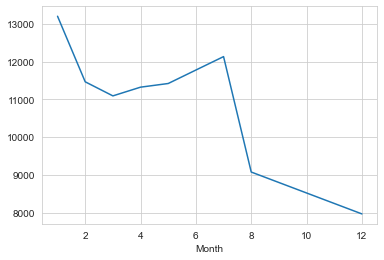

In [12]:
byMonth=df.groupby('Month').count()
byMonth['twp'].plot();

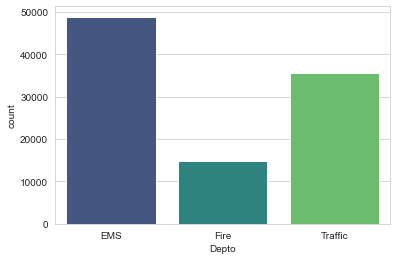

In [13]:
#Se grafica el numero de incidentes en cada departamento
sns.countplot(x='Depto',data=df,palette='viridis')

#Nos damos cuenta que las incicidencias que mas hay son del tipo EMS Emergencias medicas

In [14]:
#Obtenemos el numero de llamadas del TOP 10 del tipo de llamadas
df["Emergencia"].value_counts().head(10)

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
 CARDIAC EMERGENCY         5012
 FALL VICTIM               4863
 ROAD OBSTRUCTION -        3144
 SUBJECT IN PAIN           2687
 HEAD INJURY               2631
Name: Emergencia, dtype: int64

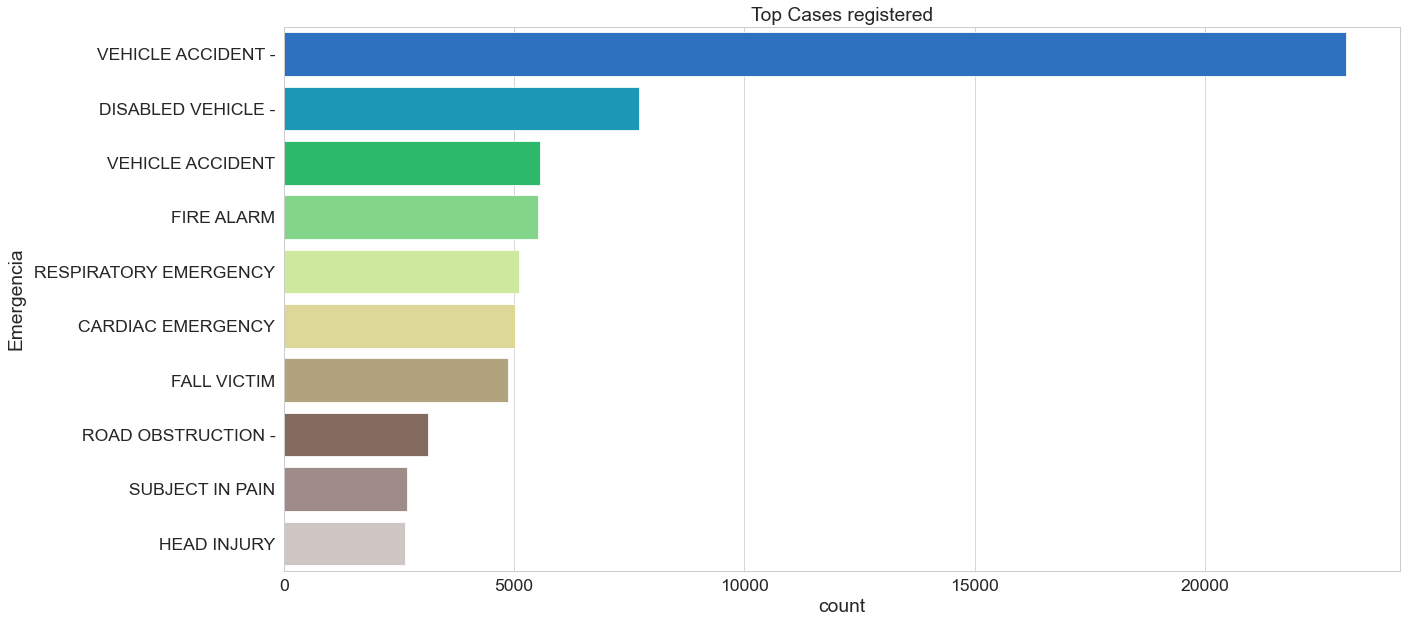

In [15]:
#Se obtiene grafica del TOP 10 de casos de emergencia
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale = 2)
sns.countplot(y='Emergencia', data=df, palette="terrain", order=df['Emergencia'].value_counts().index[:10])
plt.title("Top Cases registered")
sns.set_style("darkgrid")
plt.show()

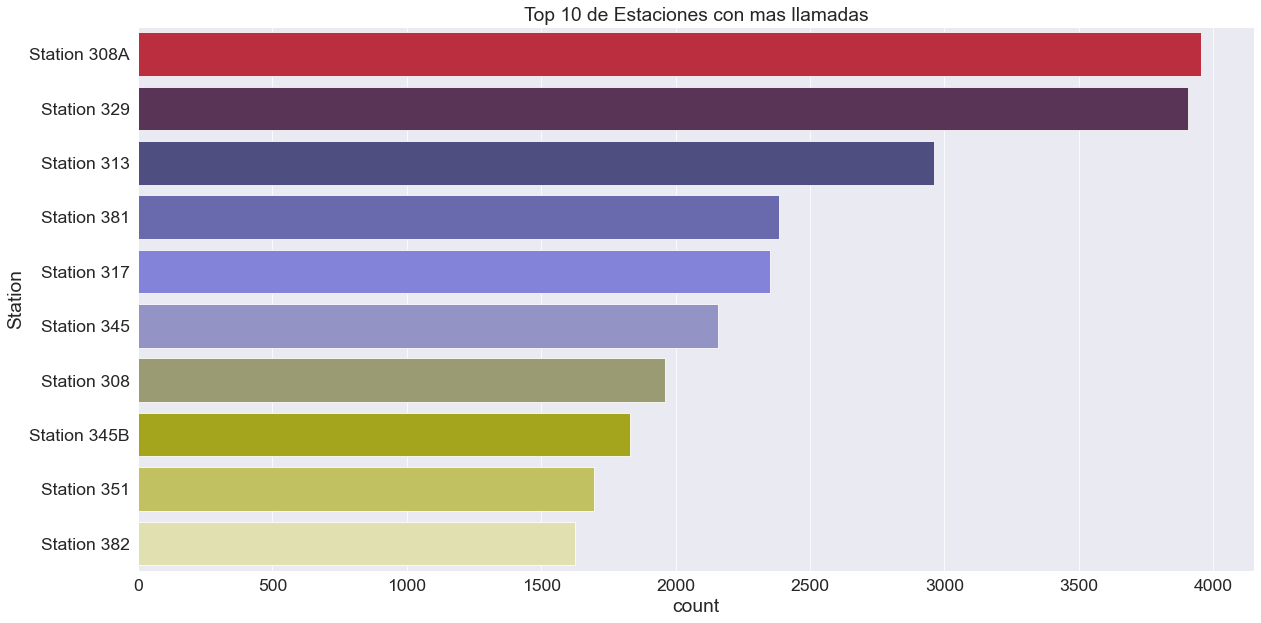

In [16]:
#Las 10 estaciones con mas reportes
#
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale =2)
sns.countplot(y='Station',data=df, palette = "gist_stern", order = df["Station"].value_counts().index[:10])
plt.title("Top 10 de Estaciones con mas llamadas")
sns.set_style("whitegrid")

#analinzando esta grafica se puede decidir que las 2 primeras estaciones deben de estar bien equipadas 
# y el suficiente personal y equipo para poder atender todas las llamadas recibidas

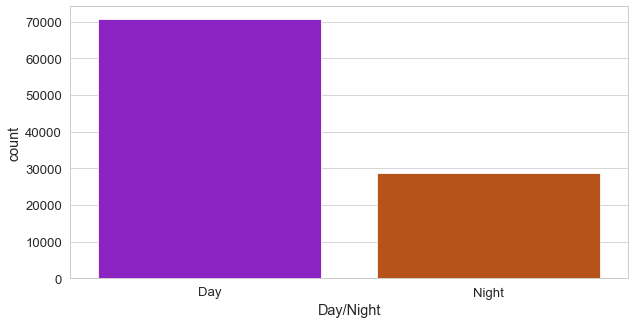

In [17]:
plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale =1.5)
sns.countplot(x='Day/Night',data=df,palette='gnuplot')
sns.set_style("darkgrid")

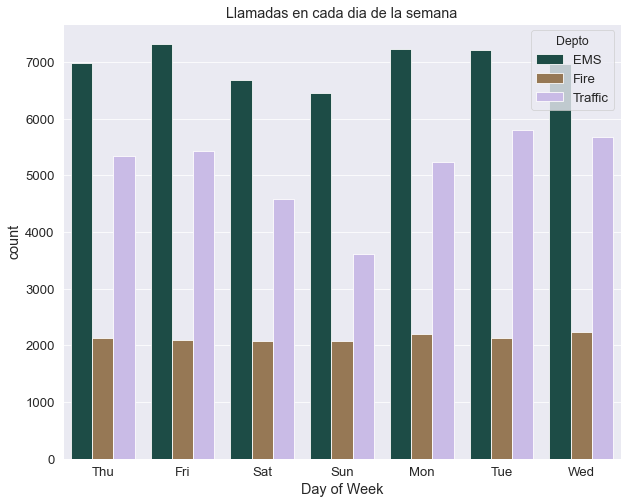

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='Day of Week',data=df,hue='Depto',palette='cubehelix')
plt.title("Llamadas en cada dia de la semana")
sns.set_style("ticks")

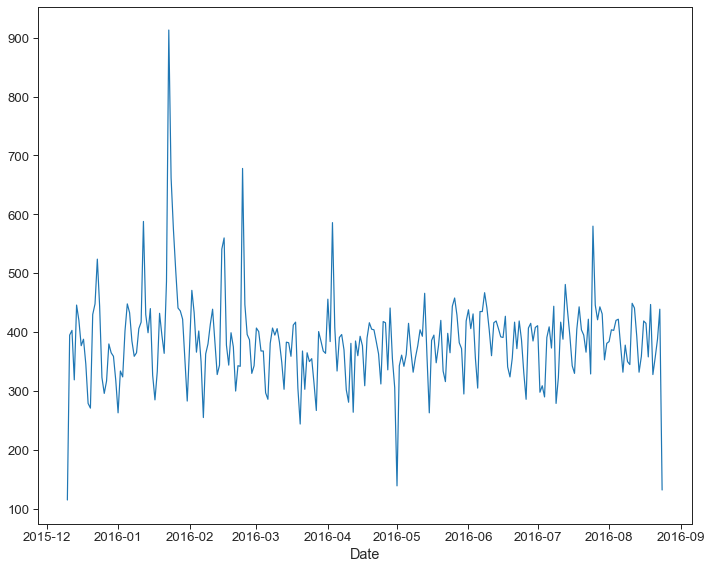

In [19]:
#Se grafica los reportes de llamadas por fecha
plt.figure(figsize=(10,8))
df.groupby('Date').count()['twp'].plot()
sns.set_context("paper", font_scale = 1)
plt.tight_layout()

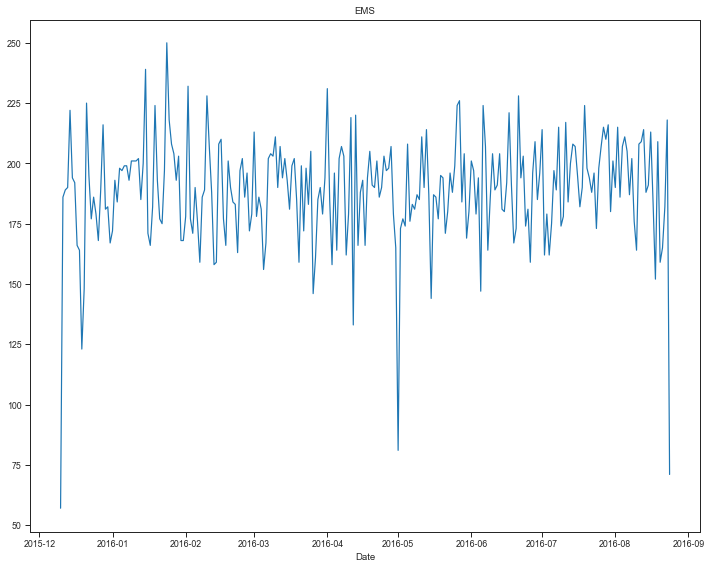

In [20]:
# Se grafican el numero de llamdas de emergencia medicas por fecha
plt.figure(figsize=(10,8))
df[df.Depto == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

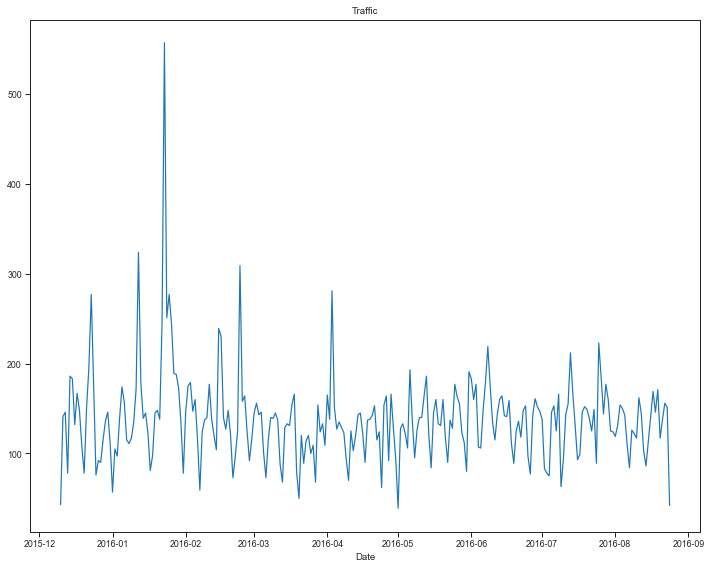

In [21]:
# Se grafican el numero de llamdas de emergencia de trafico vehicular por fecha
plt.figure(figsize=(10,8))
df[df.Depto=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

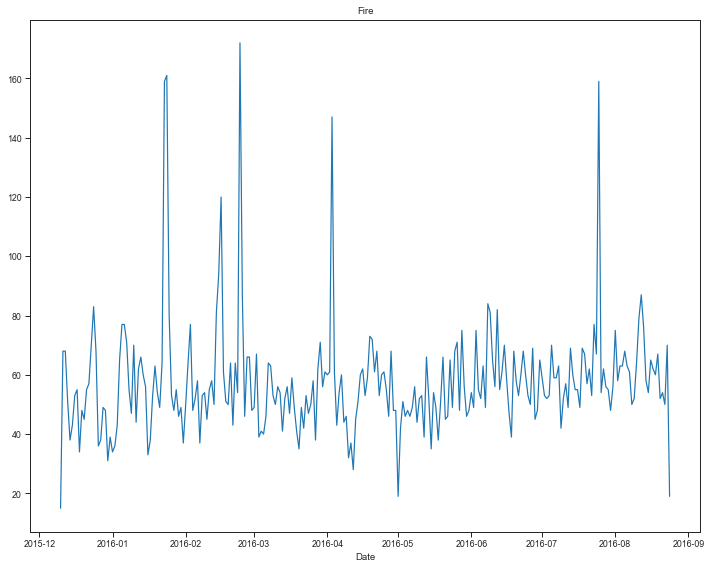

In [22]:
# Se grafican el numero de llamdas de emergencia de incendios por fecha
plt.figure(figsize=(10,8))
df[df.Depto=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

In [23]:
# Para crear mapas con Seaborn, se requiere reestructurar la informacion
# Agrupando numero de registros por dia de la semana en cada hora del dia
# Para eso se obtiene un nuevo DS del existente donde las columnas seran las horas del dia
#   y los renglones seran los dias de la semana.
# Para esto se utilizo unstack


dayHour = df.groupby(by=['Day of Week','Hour']).count()['Depto'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [24]:
# Para eso se obtiene un nuevo DS del existente donde las columnas seran el numero de mes
#   y los renglones seran los dias de la semana.
# Para esto se utilizo unstack
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Depto'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [25]:
df.head()

,lat,lng,desc,zip,twp,addr,Hour,Month,Day of Week,Date,Day/Night,Depto,Emergencia,Station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,17,12,Thu,2015-12-10,Day,EMS,BACK PAINS/INJURY,Station 332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,12,Thu,2015-12-10,Day,EMS,DIABETIC EMERGENCY,Station 345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,17,12,Thu,2015-12-10,Day,Fire,GAS-ODOR/LEAK,Station:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,17,12,Thu,2015-12-10,Day,EMS,CARDIAC EMERGENCY,Station 308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,17,12,Thu,2015-12-10,Day,EMS,DIZZINESS,Station 329


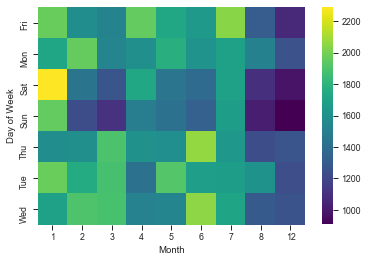

In [26]:
# Se visualiza que los primeros meses es donde hay mas llamdas de reportes y en el mes de enero los que es el dia de 
# sabado y domingo y donde hay mas reportes. Habria que revizar mas a detalle que tipo de reportes se dieron con
# mas frecuencia en estos 2 dias y mes 1

sns.heatmap(dayMonth,cmap='viridis')

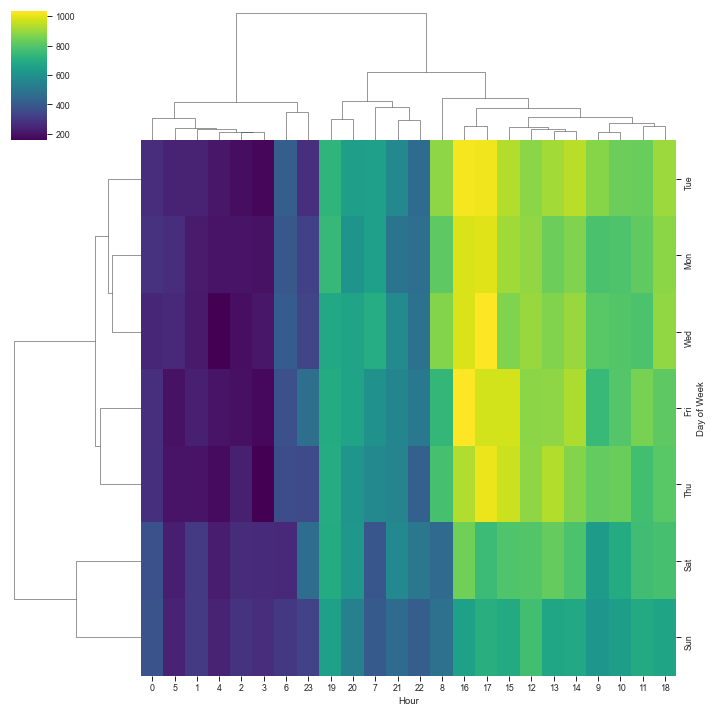

In [27]:
# En este heatmap nos damos cuenta que el mayor nuemro de reportes se dan alrededor entre las 4 y 5 de la tarde
# de lunes a viernes
sns.clustermap(dayHour,cmap='viridis')

In [28]:
df

,lat,lng,desc,zip,twp,addr,Hour,Month,Day of Week,Date,Day/Night,Depto,Emergencia,Station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,NEW HANOVER,REINDEER CT & DEAD END,17,12,Thu,2015-12-10,Day,EMS,BACK PAINS/INJURY,Station 332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,17,12,Thu,2015-12-10,Day,EMS,DIABETIC EMERGENCY,Station 345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,NORRISTOWN,HAWS AVE,17,12,Thu,2015-12-10,Day,Fire,GAS-ODOR/LEAK,Station:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,17,12,Thu,2015-12-10,Day,EMS,CARDIAC EMERGENCY,Station 308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,17,12,Thu,2015-12-10,Day,EMS,DIZZINESS,Station 329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,NORRISTOWN,MARKLEY ST & W LOGAN ST,11,8,Wed,2016-08-24,Day,Traffic,VEHICLE ACCIDENT -,NaN
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,11,8,Wed,2016-08-24,Day,Traffic,VEHICLE ACCIDENT -,NaN
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,NORRISTOWN,CHESTNUT ST & WALNUT ST,11,8,Wed,2016-08-24,Day,EMS,FALL VICTIM,Station 308A
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,HORSHAM,WELSH RD & WEBSTER LN,11,8,Wed,2016-08-24,Day,EMS,NAUSEA/VOMITING,Station 352


In [ ]:
#De todo lo que se analizo se detecto que las llamdas de tipo Emergencias medicas (EMS) son el numero uno en 
#reportes pero sin embargo
#el numero 1 de llamadas son de accidentes de trafico. Ademas de esto se identifica que la mayor numero 
#de reportes se realizan durante el dia.
#Tambien las 2 estaciones que reciben mas llamadas, sobresalen con mucha diferencia sobre las demas. para saber más cual 
#es la causa se requiere un analisis mas profundo para saber que tipo de llamadas reciben para ver 
#si se puede contrarestar en el futuro.